<a href="https://colab.research.google.com/github/saideep872/COVID-19/blob/master/covid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd #import pandas library
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
%matplotlib inline
from matplotlib import  rc
import numpy as np
import datetime as dt
import requests
import seaborn as sns
%matplotlib inline



/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


##reading the csv file

timeseries data


In [2]:
r = requests.get('https://api.covid19india.org/data.json')
x = r.json()
df = pd.DataFrame(x['cases_time_series'])
sdf = pd.DataFrame(x['statewise'])    
tdf = pd.DataFrame(x['tested'])                             
df['Date']=pd.date_range('2020-01-30', periods=df['totalconfirmed'].count())
df=df.drop(["date"],axis=1)
k=[]
l=0
for i in range(df['totalconfirmed'].count()):
  k.append(l+1)
  l=l+1
df['sno']=k



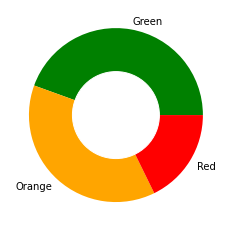

In [3]:
f = requests.get('https://api.covid19india.org/zones.json')
y = f.json()
zones=pd.DataFrame(y['zones'])
names= 'Green', 'Orange','Red', 
z=zones.zone.value_counts()
v=z.to_list()
v.pop()
my_circle=plt.Circle( (0,0), 0.5, color='white')
plt.pie(v, labels=names, colors=['green','orange','red'])
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()


In [4]:
s = requests.get('https://api.covid19india.org/states_daily.json')
i= s.json()
state= pd.DataFrame(i['states_daily'])

conf=state.loc[state['status']=='Confirmed']
conf['Date']=pd.date_range('2020-03-14', periods=conf['status'].count())
rec=state.loc[state['status']=='Recovered']
rec['Date']=pd.date_range('2020-03-14', periods=rec['status'].count())
dec=state.loc[state['status']=='Deceased']
dec['Date']=pd.date_range('2020-03-14', periods=dec['status'].count())
dec=dec.drop(['date'],axis=1)
conf['date']=conf['Date'].dt.strftime('%m/%d')
conf.set_index('Date',inplace=True)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/

In [5]:
df.to_csv('india.csv')

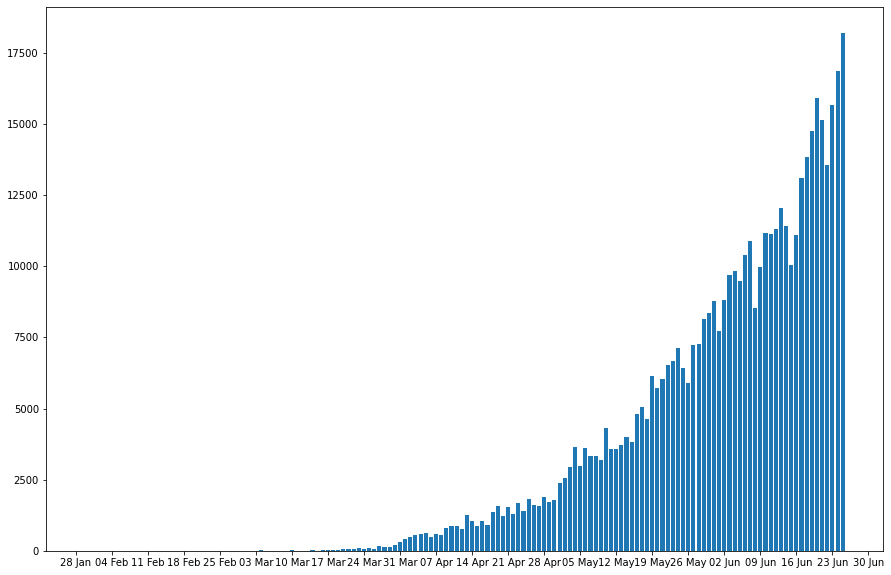

In [6]:
data = pd.read_csv('india.csv', usecols=['Date','dailyconfirmed'], parse_dates=['Date'])
#set date as index
#df=df.parse_dates['Date']
data.set_index('Date',inplace=True)

#plot data
fig, ax = plt.subplots(figsize=(15,10))
#data.plot(ax=ax)
ax.bar(data.index, data['dailyconfirmed'])
#set ticks every week
plt.style.use('ggplot')
ax.xaxis.set_major_locator(mdates.WeekdayLocator())
#set major ticks format
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d %b'))
#ax.set_xticklabels(labels=data['date'], rotation=45, ha='right')
plt.show()

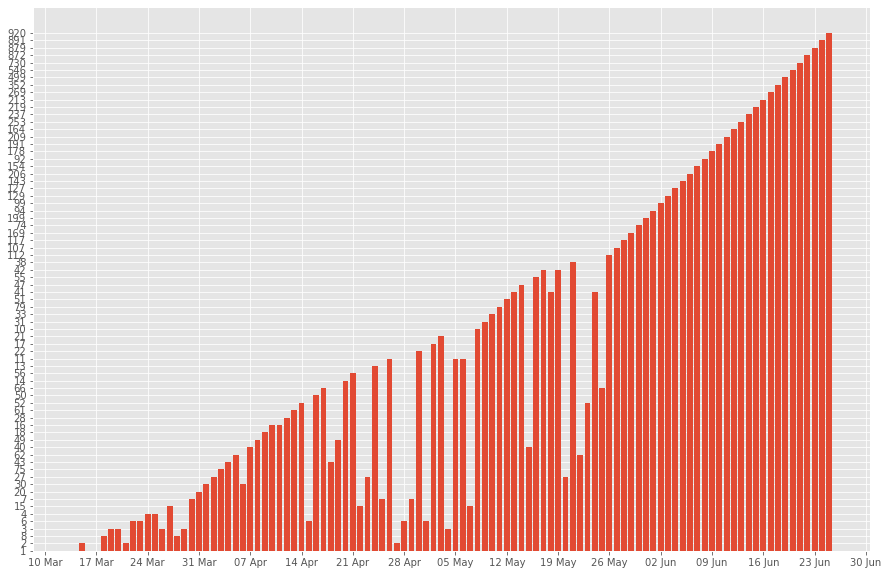

In [7]:
#read data from csv
#data = pd.read_csv('india.csv', usecols=['Date','dailyconfirmed'], parse_dates=['Date'])
#set date as index


#plot data
fig, ax = plt.subplots(figsize=(15,10))
#data.plot(ax=ax)
ax.bar(conf.index, conf['tg'])
#set ticks every week
plt.style.use('ggplot')
ax.xaxis.set_major_locator(mdates.WeekdayLocator())
#set major ticks format
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d %b'))
#ax.set_xticklabels(labels=data['date'], rotation=45, ha='right')
#plt.set_yticks([10,20,30,40,50,60,70,80,90,100])
plt.show()

In [ ]:
test=pd.read_csv('StatewiseTestingDetails.csv')
pd.set_option('display.max_rows', None)
test['Datetime'] = pd.to_datetime(test['Date'])
test.columns

FileNotFoundError: ignored

In [ ]:
test.loc[(test['State']=='Andaman and Nicobar Islands') &(test['TotalSamples']==]

SyntaxError: ignored

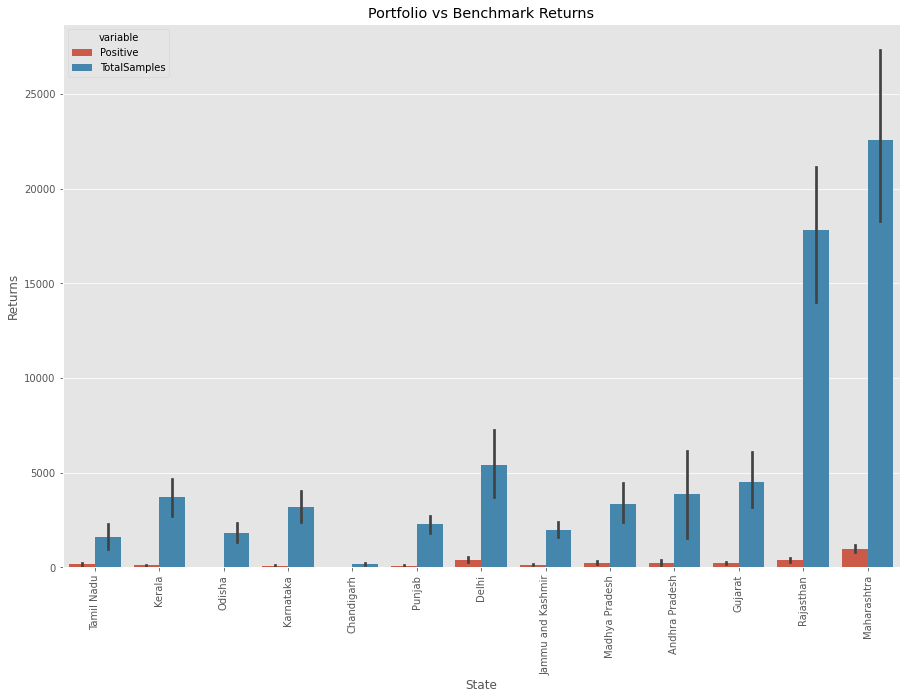

In [ ]:
dt=pd.read_csv('StatewiseTestingDetails.csv')
dt['dates']=pd.to_datetime(dt.Date,format="%Y-%m-%d")
df = pd.DataFrame({'Index': dt.index,
                   'State': dt.State,
                   'TotalSamples': dt.TotalSamples,
                   'Positive': dt.Positive},
                    columns = ['Index','State','TotalSamples','Positive'])
df1 = pd.melt(df, id_vars=['Index','State']).sort_values(['variable','value'])
fig, ax = plt.subplots(figsize=(15,10))
sns.barplot(x='State', y='value', hue='variable', data=df1)
plt.xticks(rotation=90)
plt.ylabel('Returns')
plt.title('Portfolio vs Benchmark Returns');

In [ ]:
pd.set_option('display.max_rows',None)
df1

,Index,State,variable,value
1260,501,Nagaland,Positive,0.0
1261,502,Nagaland,Positive,0.0
1262,503,Nagaland,Positive,0.0
1263,504,Nagaland,Positive,0.0
1264,505,Nagaland,Positive,0.0
1265,506,Nagaland,Positive,0.0
1266,507,Nagaland,Positive,0.0
1267,508,Nagaland,Positive,0.0
1268,509,Nagaland,Positive,0.0
1269,510,Nagaland,Positive,0.0


In [ ]:
dt

,Date,State,TotalSamples,Negative,Positive,dates
0,2020-04-17,Andaman and Nicobar Islands,1403.0,1210.0,12.0,2020-04-17
1,2020-04-24,Andaman and Nicobar Islands,2679.0,NaN,27.0,2020-04-24
2,2020-04-27,Andaman and Nicobar Islands,2848.0,NaN,33.0,2020-04-27
3,2020-05-01,Andaman and Nicobar Islands,3754.0,NaN,33.0,2020-05-01
4,2020-04-02,Andhra Pradesh,1800.0,1175.0,132.0,2020-04-02
5,2020-04-10,Andhra Pradesh,6374.0,6009.0,365.0,2020-04-10
6,2020-04-11,Andhra Pradesh,6958.0,6577.0,381.0,2020-04-11
7,2020-04-12,Andhra Pradesh,6958.0,6553.0,405.0,2020-04-12
8,2020-04-13,Andhra Pradesh,8755.0,8323.0,432.0,2020-04-13
9,2020-04-14,Andhra Pradesh,10505.0,10032.0,473.0,2020-04-14
